# SMOTE 

SMOTE Oversampling:

Overfitting’i önlemek için azınlık sınıfından sentetik örnekler oluşturulması.

Önce azınlık sınıfından rastgele bir örnek seçilir.
Daha sonra bu örnek için en yakın komşulardan k tanesi bulunur.
k en yakın komşulardan biri rastgele seçilir ve azınlık sınıfından rastgele seçilen örnekle birleştirilip özellik uzayında bir çizgi parçası oluşturarak sentetik örnek oluşturulur.

In [1]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,rcParams
import itertools

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
data=pd.read_csv("C:\\Users\\cemre\\Desktop\\Dry_Bean_Dataset.csv")

In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE


# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after applying SMOTE
print('Before SMOTE:')
print(y.value_counts())

print('After SMOTE:')
print(pd.Series(y_resampled).value_counts())

Before SMOTE:
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64
After SMOTE:
SEKER       3546
BARBUNYA    3546
BOMBAY      3546
CALI        3546
HOROZ       3546
SIRA        3546
DERMASON    3546
Name: Class, dtype: int64


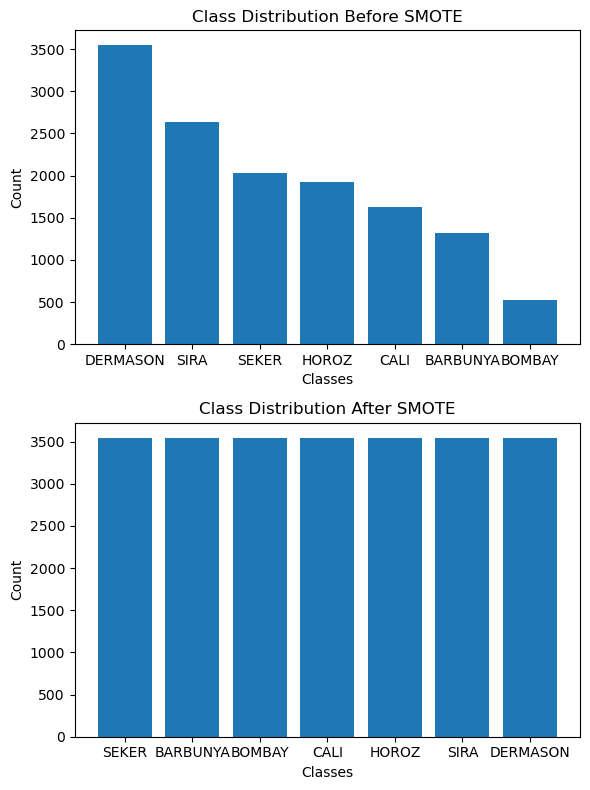

In [4]:
# Calculate class distribution before and after SMOTE
before_counts = y.value_counts()
after_counts = pd.Series(y_resampled).value_counts()

# Plotting the class distribution
fig, axes = plt.subplots(2, 1, figsize=(6, 8))

# Plot before SMOTE
axes[0].bar(before_counts.index, before_counts.values)
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Count')

# Plot after SMOTE
axes[1].bar(after_counts.index, after_counts.values)
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123456)

# Naive Bayes Classification¶

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
y_train.value_counts()

DERMASON    2465
SIRA        1826
SEKER       1433
HOROZ       1361
CALI        1134
BARBUNYA     931
BOMBAY       377
Name: Class, dtype: int64

In [8]:
# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))

Accuracy: 0.767


In [9]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Naive Bayes Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Naive Bayes Classifier Accuracy: 0.7668952007835456
Precision: 0.772166895636504
Recall: 0.7711872109946675
F-score: 0.7687249432604476


In [10]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[188   1 145   0  42   0  15]
 [  0 145   0   0   0   0   0]
 [ 76   2 392   0  25   0   1]
 [  0   0   0 888   0 141  52]
 [ 15   0  27  16 452   0  57]
 [  3   0   0  78   7 426  80]
 [  0   0   0  32  70  67 641]]


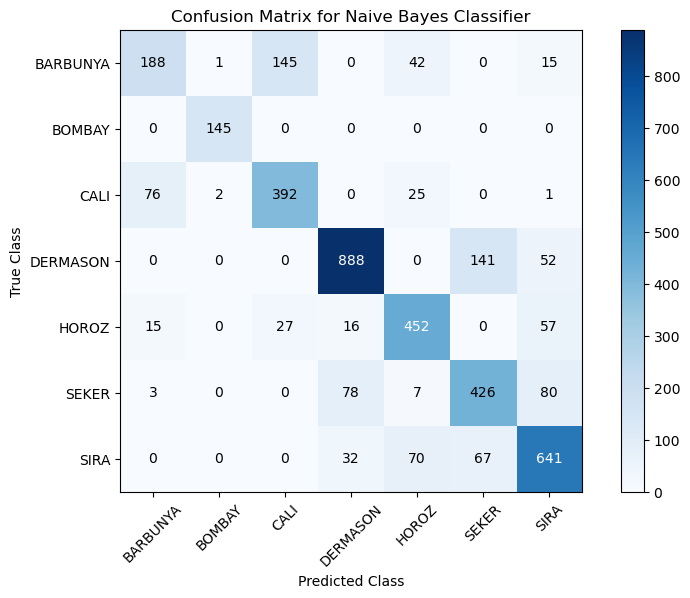

In [11]:
# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# DECISION TREE CLASSIFICATION

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [13]:
# Create a Decision Tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [15]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Decision Tree Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Decision Tree Classifier Accuracy: 0.8839373163565132
Precision: 0.8984319717969175
Recall: 0.9006037509385045
F-score: 0.8994849423080451


In [16]:

# Generate and print the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.86      0.86      0.86       391
      BOMBAY       0.99      1.00      1.00       145
        CALI       0.90      0.90      0.90       496
    DERMASON       0.88      0.88      0.88      1081
       HOROZ       0.93      0.93      0.93       567
       SEKER       0.91      0.93      0.92       594
        SIRA       0.82      0.80      0.81       810

    accuracy                           0.88      4084
   macro avg       0.90      0.90      0.90      4084
weighted avg       0.88      0.88      0.88      4084



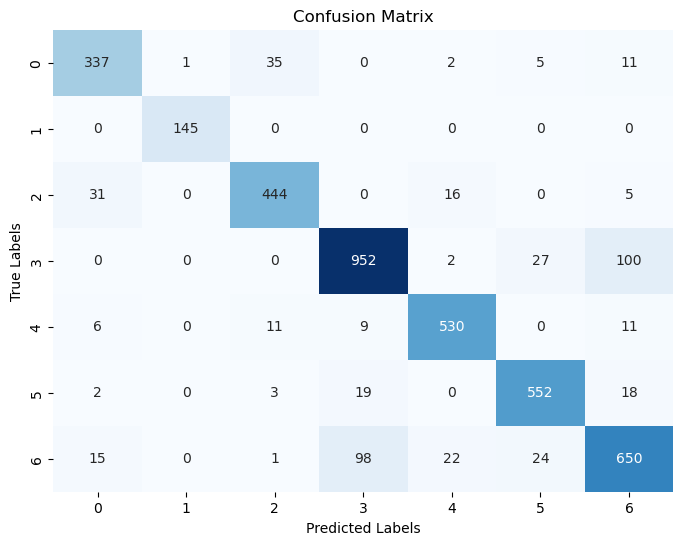

In [17]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# SUPPORT VECTOR MACHINE CLASSIFICATION

In [18]:
from sklearn.svm import SVC

In [19]:
# Create an SVM classifier
classifier = SVC()

# Train the classifier
classifier.fit(X_train, y_train)

SVC()

In [20]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [21]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Support Vector Machine Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Support Vector Machine Classifier Accuracy: 0.6356513222331048
Precision: 0.633568474908337
Recall: 0.6263539220588924
F-score: 0.6009545352231024


In [22]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("SCV Confusion Matrix:")
print(cm)

SCV Confusion Matrix:
[[ 25   0 254   0  98   0  14]
 [  0 145   0   0   0   0   0]
 [ 13   0 434   0  47   0   2]
 [  0   0   0 889   0 157  35]
 [ 13   0  30  13 349  15 147]
 [  0   0   0 188  15 171 220]
 [  0   0   0  36  85 106 583]]


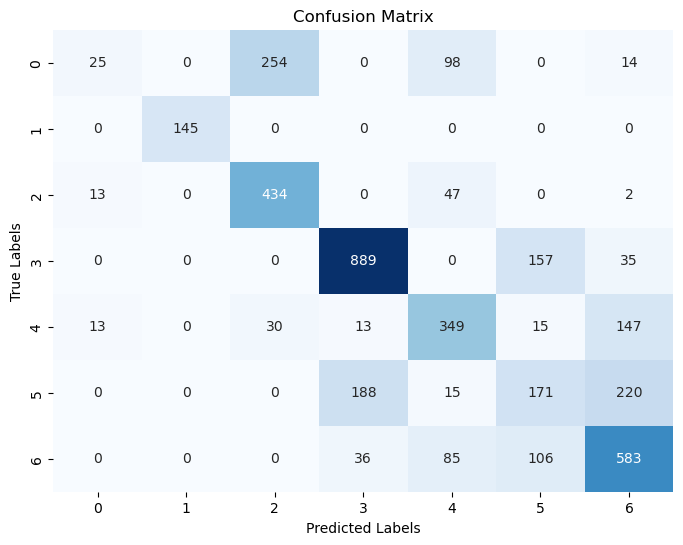

In [23]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# RANDOM FOREST CLASSIFICATION

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Create a Random Forest classifier with 100 trees
classifier = RandomForestClassifier(n_estimators=100)

# Train the classifier
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [26]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [27]:
# Calculate precision, recall, and F-score  accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')


print("Random Forest Classifier Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Random Forest Classifier Accuracy: 0.920666013712047
Precision: 0.9327163895032523
Recall: 0.9305411234819797
F-score: 0.9315254490558534


In [28]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[350   1  25   0   4   4   7]
 [  0 145   0   0   0   0   0]
 [ 16   0 460   0  14   0   6]
 [  0   0   0 999   0  22  60]
 [  2   0  12   9 533   0  11]
 [  3   0   0  15   0 569   7]
 [  4   0   1  78  10  13 704]]


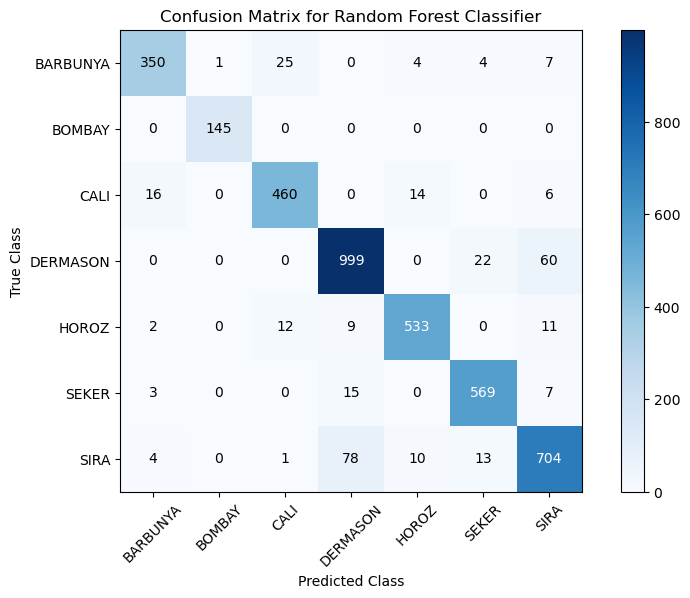

In [29]:
# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# K-NEAREST NEIGHBOOR CLASSIFICATION¶

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# Create a KNN classifier with k=10
classifier = KNeighborsClassifier(n_neighbors=10)

# Train the classifier
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [32]:
# Generate predictions
y_pred = classifier.predict(X_test)

In [33]:
# Calculate  accuracy, precision, recall, and F-score 
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')

print("KNN Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

KNN Accuracy: 0.6985798237022527
Precision: 0.7093072650213409
Recall: 0.6960744208505186
F-score: 0.6996389343283367


In [34]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[196   0 123   1  60   1  10]
 [  0 145   0   0   0   0   0]
 [170   0 283   0  43   0   0]
 [  0   0   0 945   1  75  60]
 [ 45   0  20  21 371   0 110]
 [  1   0   0 128  12 323 130]
 [  2   0   0  77  99  42 590]]


<function matplotlib.pyplot.show(close=None, block=None)>

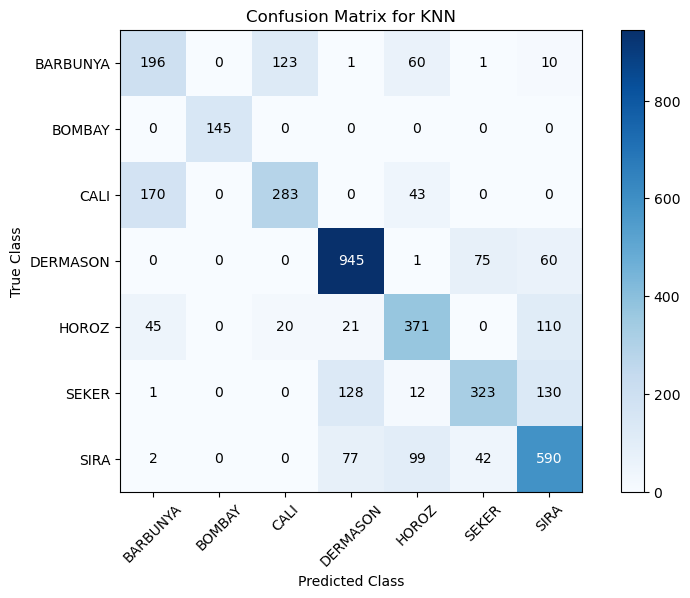

In [35]:
# Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix for KNN")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show

# TABLO 3

In [36]:
#tablo oluşturmak için gerekli kütüphane
import pandas as pd

# Results of classification methods
results = {
    'Method': ['Naive Bayes','Decision Tree','Support Vector Machine','Random Forest','K-Nearest Neighbors'],
    'Accuracy': [0.7668952007835456, 0.8839373163565132,0.6356513222331048,0.9218903036238981,0.6985798237022527],
    'Precision': [0.772166895636504,0.8984319717969175,0.633568474908337,0.9337994405205606,0.7093072650213409],
    'Recall': [0.7711872109946675,0.9006037509385045,0.6263539220588924,0.9309941467657635,0.6960744208505186],
    'F-score': [0.7687249432604476,0.8994849423080451,0.6009545352231024,0.9322337234894713,0.6996389343283367]
}

# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Display the results table
print(df_results)


                   Method  Accuracy  Precision    Recall   F-score
0             Naive Bayes  0.766895   0.772167  0.771187  0.768725
1           Decision Tree  0.883937   0.898432  0.900604  0.899485
2  Support Vector Machine  0.635651   0.633568  0.626354  0.600955
3           Random Forest  0.921890   0.933799  0.930994  0.932234
4     K-Nearest Neighbors  0.698580   0.709307  0.696074  0.699639


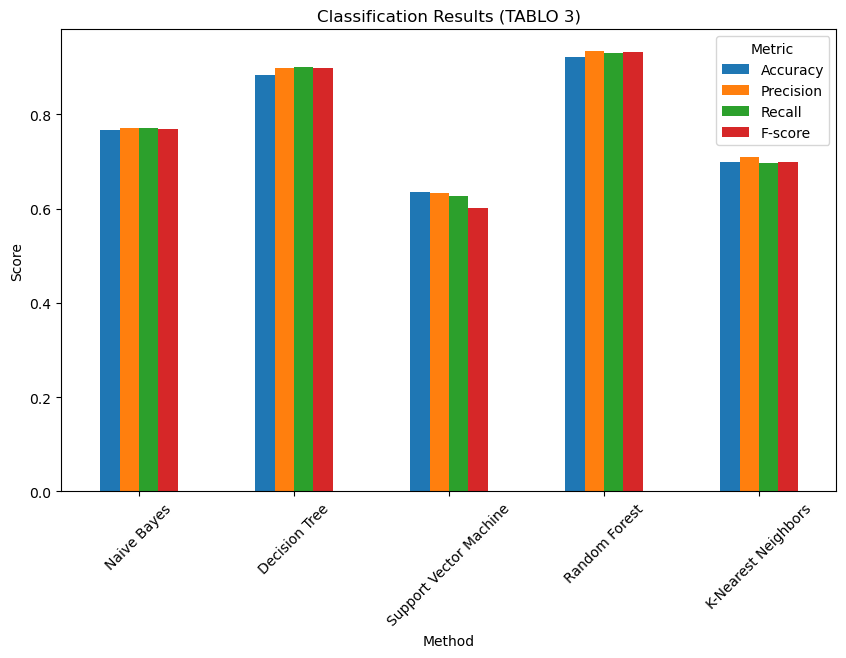

In [37]:
# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Set the Method column as the index
df_results.set_index('Method', inplace=True)

# Plotting the results
df_results.plot(kind='bar', rot=45, figsize=(10, 6))
plt.xlabel('Method')
plt.ylabel('Score')
plt.title('Classification Results (TABLO 3)')
plt.legend(title='Metric')
plt.show()

In [38]:
from tabulate import tabulate

# Convert DataFrame to tabular format
table = tabulate(df_results, headers='keys', tablefmt='fancy_grid')

# Display the tabular results
print(table)

╒════════════════════════╤════════════╤═════════════╤══════════╤═══════════╕
│ Method                 │   Accuracy │   Precision │   Recall │   F-score │
╞════════════════════════╪════════════╪═════════════╪══════════╪═══════════╡
│ Naive Bayes            │   0.766895 │    0.772167 │ 0.771187 │  0.768725 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Decision Tree          │   0.883937 │    0.898432 │ 0.900604 │  0.899485 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Support Vector Machine │   0.635651 │    0.633568 │ 0.626354 │  0.600955 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ Random Forest          │   0.92189  │    0.933799 │ 0.930994 │  0.932234 │
├────────────────────────┼────────────┼─────────────┼──────────┼───────────┤
│ K-Nearest Neighbors    │   0.69858  │    0.709307 │ 0.696074 │  0.699639 │
╘════════════════════════╧════════════╧═════════════╧══════════╧═══════════╛

# REGRESYON MODELLERİ

# LOGISTIC REGRESSION

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [46]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Generate predictions
y_pred = model.predict(X_test)

In [48]:
# Calculate accuracy ,precision, recall, and F-score
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f_score = f1_score(y_test, y_pred, average='macro')

print("Logistic Regression Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-score:", f_score)

Logistic Regression Accuracy: 0.6998041136141038
Precision: 0.7154194920723632
Recall: 0.7065903639201657
F-score: 0.7097653596260844


In [49]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[186   0 120   0  80   1   4]
 [  0 145   0   0   0   0   0]
 [104   0 368   0  22   1   1]
 [  0   0   0 919   9  54  99]
 [ 12   0  24  29 325  12 165]
 [  5   0   1 111   8 391  78]
 [  3   0   0  49 125 109 524]]


In [50]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate coefficient of determination (R^2 score)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

ValueError: could not convert string to float: 'BARBUNYA'

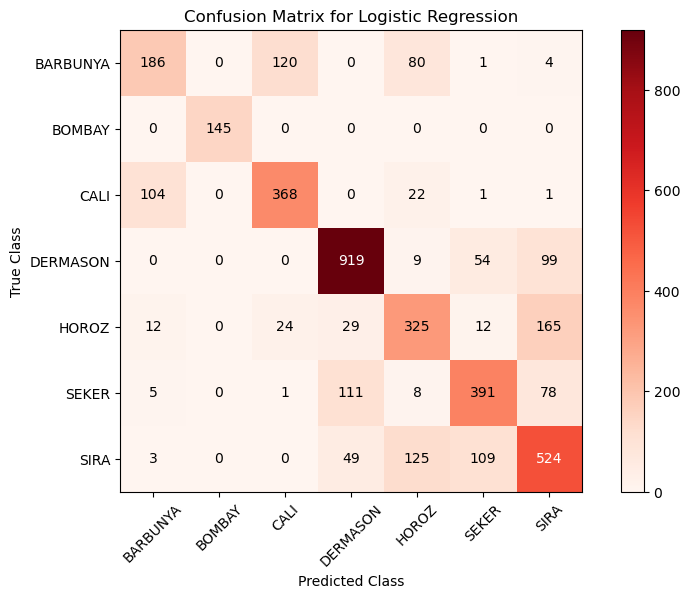

In [51]:
#Create a bar plot for the confusion matrix
plt.figure(figsize=(10, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Reds)
plt.title("Confusion Matrix for Logistic Regression")
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add value labels to the plot
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.show()

# DECISION TREE REGRESSION

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

In [53]:
data=pd.read_csv("C:\\Users\\cemre\\Desktop\\Dry_Bean_Dataset.csv")

In [54]:
# Convert the 'Class' column to numeric values
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

In [55]:
features = data.drop('Class', axis=1)
labels = data['Class']

In [56]:
# Split the dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

In [57]:
# Create a Decision Tree Regression model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [58]:
# Generate predictions
y_pred = model.predict(X_test)

In [59]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate coefficient of determination (R^2 score)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 0.8729187071498531
R^2 Score: 0.7399269907259634


In [60]:
accuracy = accuracy_score(y_test, y_pred)
print("Regression Accuracy:", accuracy)

Regression Accuracy: 0.893486777668952


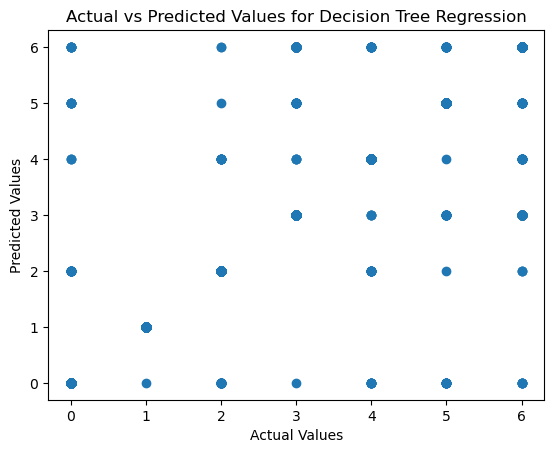

In [61]:
# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree Regression')
plt.show()

# RIDGE REGRESSİON

In [62]:
from sklearn.linear_model import Ridge

In [63]:
# Create a Ridge Regression model
model = Ridge(alpha=1.0)

# Train the model
model.fit(X_train, y_train)

Ridge()

In [64]:
# Generate predictions
y_pred = model.predict(X_test)

In [65]:
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate coefficient of determination (R^2 score)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 1.9905689430480373
R^2 Score: 0.4069399006509439


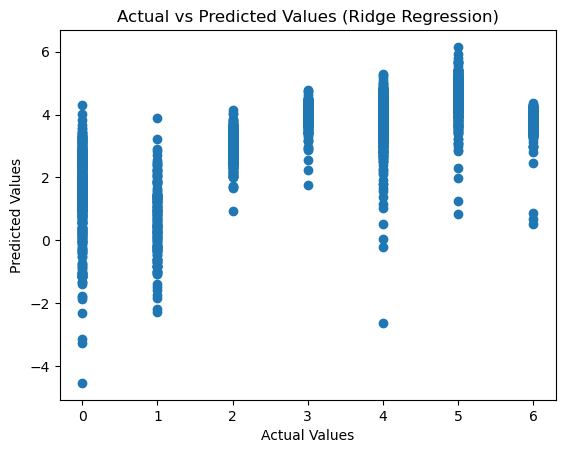

In [66]:
# Create a scatter plot of the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.show()

# TABLO3.1

In [67]:
#tablo oluşturmak için gerekli kütüphane
import pandas as pd

# Results of classification methods
results = {
    'Method': ['Logistic Regression','Decision Tree Regression','Ridge Regression'],
    'Mean Squared Error': [1.9905689430480373,0.8596963761018609,1.9905689430480373],
    'R^2 Score': [0.4069399006509439,0.7438663855368464,0.4069399006509439]
    
}
# Create a DataFrame from the results dictionary
df_results = pd.DataFrame(results)

# Display the results table
print(df_results)




                     Method  Mean Squared Error  R^2 Score
0       Logistic Regression            1.990569   0.406940
1  Decision Tree Regression            0.859696   0.743866
2          Ridge Regression            1.990569   0.406940


In [68]:
from tabulate import tabulate
# Convert DataFrame to tabular format
table = tabulate(df_results, headers='keys', tablefmt='fancy_grid')

# Display the tabular results
print(table)


╒════╤══════════════════════════╤══════════════════════╤═════════════╕
│    │ Method                   │   Mean Squared Error │   R^2 Score │
╞════╪══════════════════════════╪══════════════════════╪═════════════╡
│  0 │ Logistic Regression      │             1.99057  │    0.40694  │
├────┼──────────────────────────┼──────────────────────┼─────────────┤
│  1 │ Decision Tree Regression │             0.859696 │    0.743866 │
├────┼──────────────────────────┼──────────────────────┼─────────────┤
│  2 │ Ridge Regression         │             1.99057  │    0.40694  │
╘════╧══════════════════════════╧══════════════════════╧═════════════╛


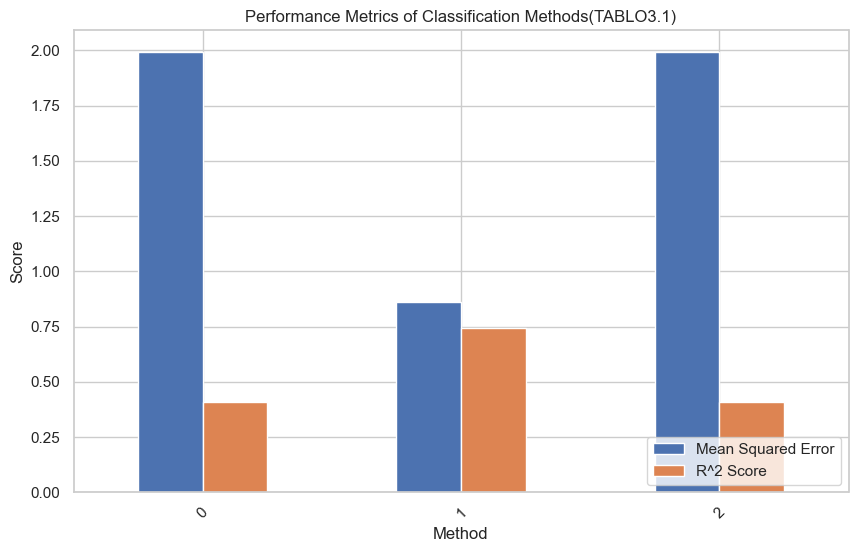

In [69]:
# Plot the results using a bar plot
sns.set(style='whitegrid')
df_results.plot(kind='bar', figsize=(10, 6))
plt.title('Performance Metrics of Classification Methods(TABLO3.1)')
plt.xlabel('Method')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.show()
